In [4]:
from timeit import default_timer as timer
import os
import subprocess as sp

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


In [5]:
from lims_apical_queries import get_benchmark_apical, get_all_intact_apical, convert_coords_str
data, _ = get_benchmark_apical()

outlier_ids = [323865917, 325941643, 469704261, 471758398, 479225052, 501847931, 560678143, 589128331]
[data.pop(sid) for sid in outlier_ids]

print(len(data))

182


In [6]:

outdir = '/home/matthew.aitken/allen_dev/sandbox/tmpout/new_gradients/'
!mkdir {outdir}
for i in [0, 35, 51, 99]:
    sid = list(data.keys())[i]
    sdata = data[sid]
    sid_dir = os.path.join(outdir, str(sid))
    print(sid)
    !mkdir {sid_dir}
    
    args = {
        'pia_path_str': data[sid]['pia_path_str'],
        'wm_path_str': data[sid]['wm_path_str'],
        'soma_path_str': data[sid]['soma_path_str'],
        'resolution': data[sid]['resolution'],
        'output_dir': sid_dir,
        'output_json': os.path.join(sid_dir, 'output.json')
    }
    cmd = ['python', '-m',
           'neuron_morphology.transforms.pia_wm_streamlines.'
           'calculate_pia_wm_streamlines']
    for key, value in args.items():
        cmd.append(f'--{key}')
        cmd.append(f'{value}')

    sp.check_call(cmd)
    sid_swc = os.path.join(sid_dir, f'{sid}.swc')
    !cp {data[sid]['swc_file']} {sid_swc}

mkdir: cannot create directory ‘/home/matthew.aitken/allen_dev/sandbox/tmpout/new_gradients/’: File exists
313862022
mkdir: cannot create directory ‘/home/matthew.aitken/allen_dev/sandbox/tmpout/new_gradients/313862022’: File exists
471143169
mkdir: cannot create directory ‘/home/matthew.aitken/allen_dev/sandbox/tmpout/new_gradients/471143169’: File exists
476135066
mkdir: cannot create directory ‘/home/matthew.aitken/allen_dev/sandbox/tmpout/new_gradients/476135066’: File exists
485880739
mkdir: cannot create directory ‘/home/matthew.aitken/allen_dev/sandbox/tmpout/new_gradients/485880739’: File exists


<IPython.core.display.Javascript object>


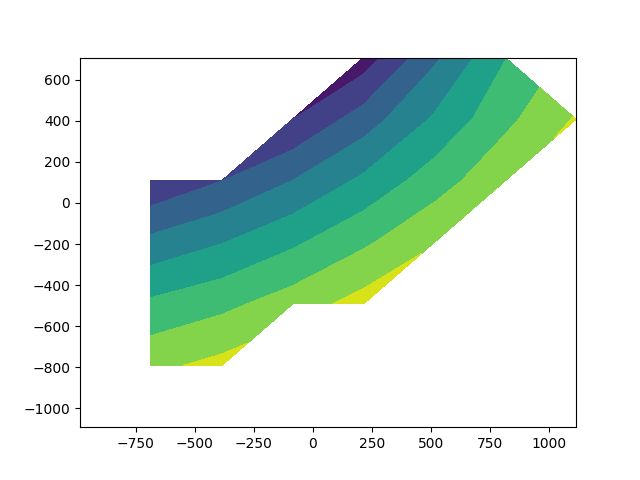

<IPython.core.display.Javascript object>


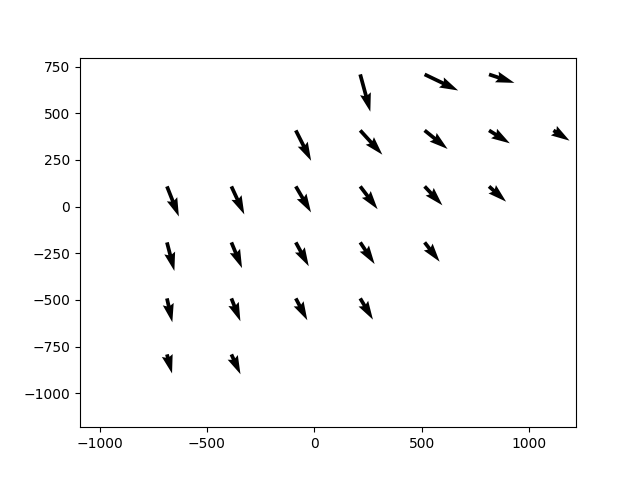

<IPython.core.display.Javascript object>


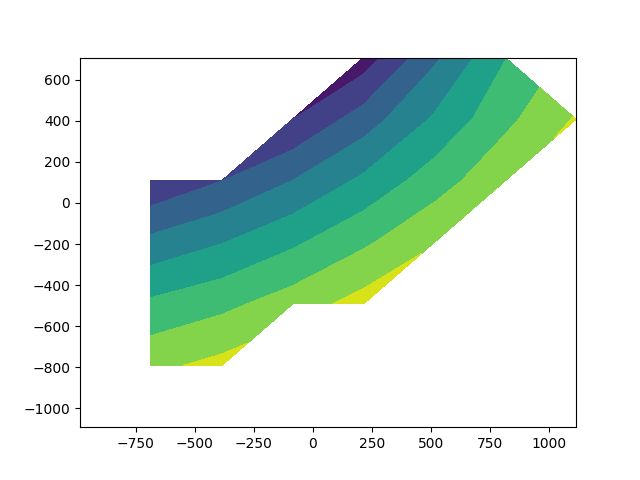

<IPython.core.display.Javascript object>


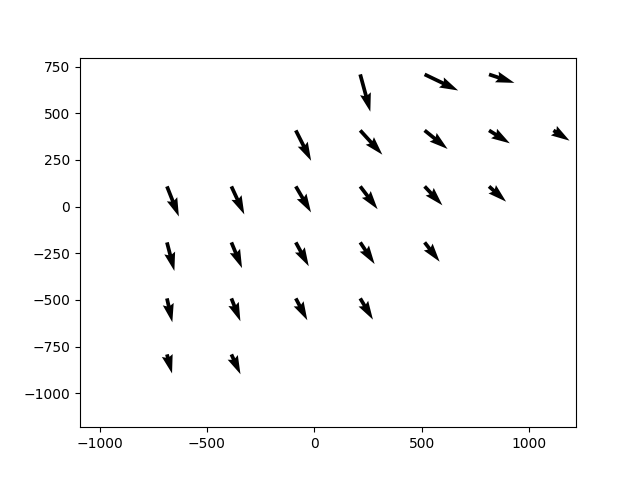

<IPython.core.display.Javascript object>


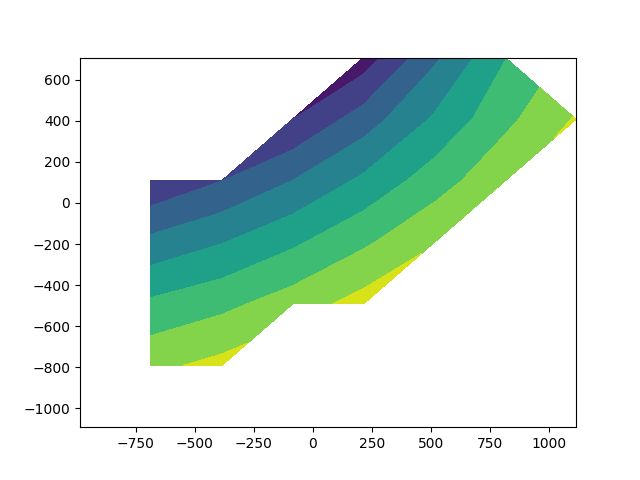

<IPython.core.display.Javascript object>


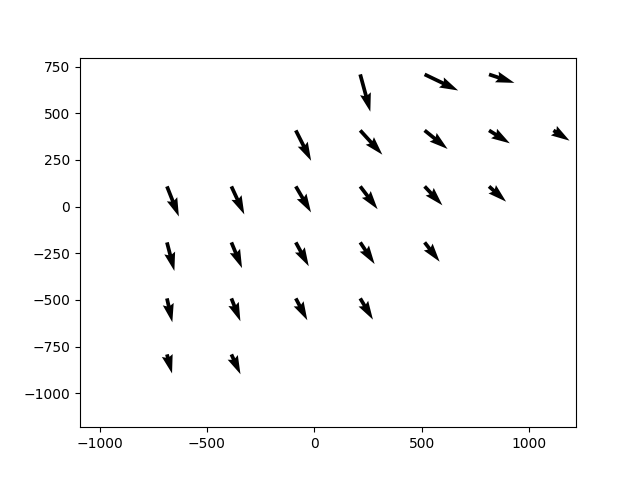

<IPython.core.display.Javascript object>


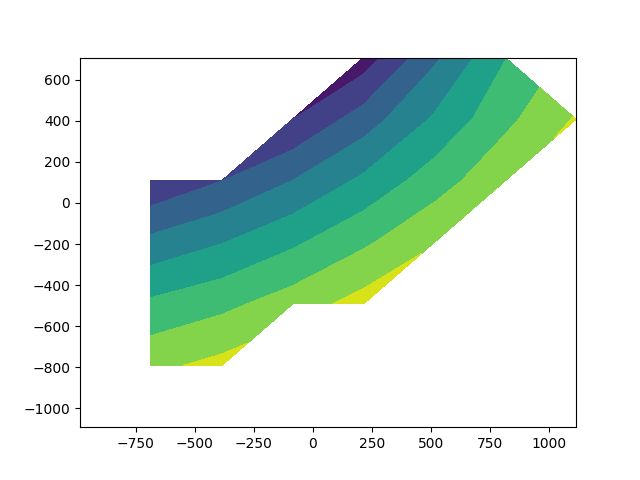

<IPython.core.display.Javascript object>


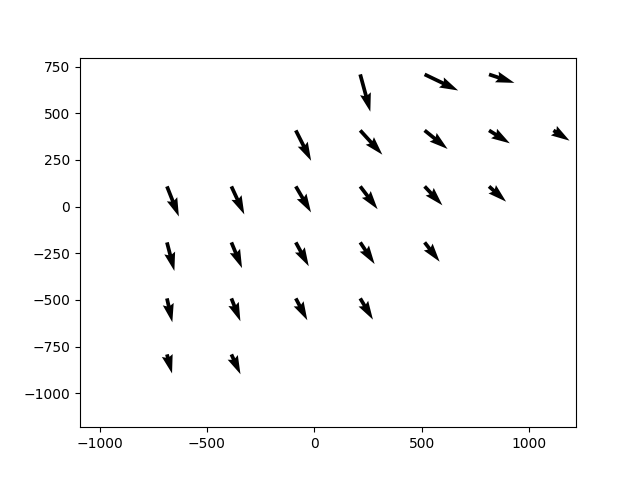

In [7]:
import xarray as xr
%matplotlib notebook

# Downsample xarrays for plotting by slicing using large steps
n = 300

for i in [0, 35, 51, 99]:
    sid_dir = os.path.join(outdir, str(sid))
    with xr.open_dataarray(os.path.join(sid_dir, 'depth_field.nc')) as depth:
        depth_ds = depth[::n, ::n]
    x = depth_ds.x
    y = depth_ds.y
    vals = depth_ds.values
    X, Y = np.meshgrid(x, y, indexing='ij')  

    fig, ax = plt.subplots()
    plt.contourf(X, Y, vals)
    
    
    with xr.open_dataarray(os.path.join(sid_dir, 'gradient_field.nc')) as gradient:
        gradient_ds = gradient[::n,::n,:]
    
    x = gradient_ds.x
    y = gradient_ds.y
    vals = gradient_ds.values
    X, Y = np.meshgrid(x, y, indexing='ij')  

    fig, ax = plt.subplots()
    plt.quiver(X, Y, vals[:, :, 0].flatten(), vals[:, :, 1].flatten())

    
